# Training.ipynb
This jupyter notebook is used for the purpose of hyperparameter tuning of different models.

## Import libraries and magic

In [1]:
# load libraries and magics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')
from pandas.plotting import scatter_matrix
from pandas import DatetimeIndex as dt
import joblib


## Load the dataset

In [2]:
dataset = pd.read_csv("supermarket_sales.csv")

In [3]:
dataset  #looking at the dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Exploratory Data Analysis and Data Visualization 

In [4]:
dataset.head()   # observe the head of dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


First, lets look at the general information about the dataset.

In [5]:
dataset.info()   # getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [6]:
dataset.isnull().sum()   #Finding the number of missing samples in each column

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
dataset.nunique()   # To check for distinct values in a=each column

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [8]:
dataset.describe()  # to summarizes the count, mean, standard deviation, min, and max for numeric variables

,Unit price,Quantity,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


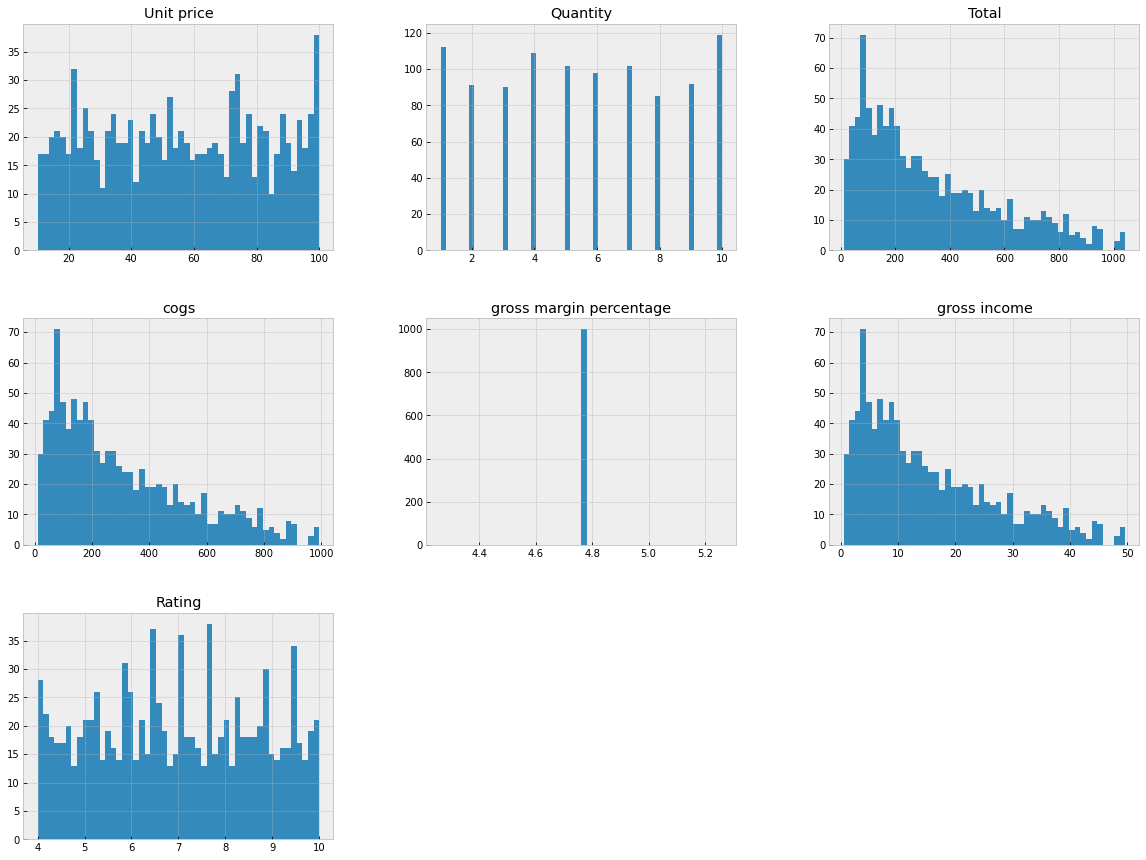

In [9]:
dataset.hist(bins=50,figsize=(20,15));  #discover and visualize the data

In [10]:
corr_matrix = dataset.corr(method='pearson')   # creating a correlation matrix for current numerical attributes

corr_matrix

,Unit price,Quantity,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,NaN,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,NaN,-0.036442,1.000000


array([[<AxesSubplot:xlabel='Unit price', ylabel='Unit price'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Unit price'>,
        <AxesSubplot:xlabel='Total', ylabel='Unit price'>,
        <AxesSubplot:xlabel='cogs', ylabel='Unit price'>,
        <AxesSubplot:xlabel='gross margin percentage', ylabel='Unit price'>,
        <AxesSubplot:xlabel='gross income', ylabel='Unit price'>,
        <AxesSubplot:xlabel='Rating', ylabel='Unit price'>],
       [<AxesSubplot:xlabel='Unit price', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Total', ylabel='Quantity'>,
        <AxesSubplot:xlabel='cogs', ylabel='Quantity'>,
        <AxesSubplot:xlabel='gross margin percentage', ylabel='Quantity'>,
        <AxesSubplot:xlabel='gross income', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Rating', ylabel='Quantity'>],
       [<AxesSubplot:xlabel='Unit price', ylabel='Total'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Total'>,
    

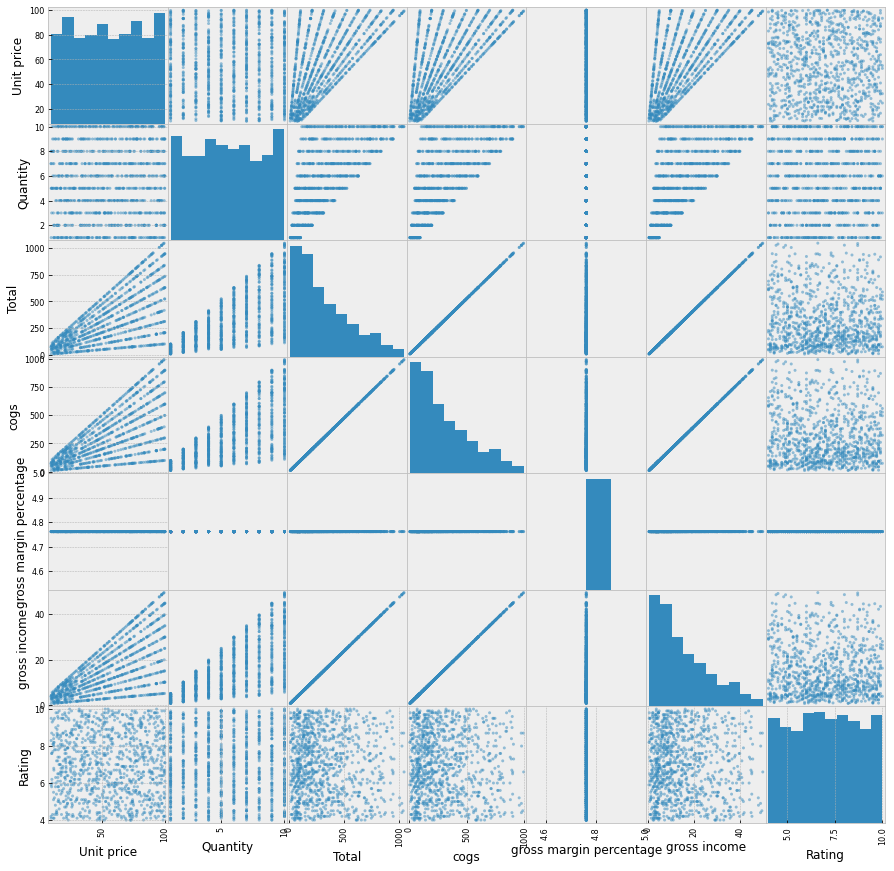

In [11]:
scatter_matrix(dataset, figsize=(15,15)) #plotting the scatter matrix for the dataset

Following are some observations I made - 
1. The dataset has a total of 1000 samples. There are a total of 16 attributes, and none of the samples have any missing attribute value.
2. It can also be observed that the the dataset has a mix of numerical and categorical attributes, Which, during the data-preprocessing will have to be encoded and transformed to numerical type.
3. Some attributes such as 'Invoice ID', 'gross margin percentage', etc. will have to be dropped due to being irrevelent to the problem.
4. The numerical attributes need to be scaled appropriately.

## Data cleaning and preprocessing

The first step is to convert the date and time attributes as required

In [12]:
dataset['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [13]:
# 0. Monday, 1. Tuesday, 2. Wednesday, 3. Thursday 4. Friday, 5. Saturday, 6. Sunday
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].dt.weekday

# to handle time data
hour = pd.to_datetime(dataset['Time']).dt.strftime('%H').astype('float')
hour_cat = pd.cut(hour, bins=[0., 12.0, 16.0, 18.0, np.inf], labels=[1, 2, 3, 4])
dataset['Time'] = hour_cat
dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,5,2,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,4,1,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,6,2,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,6,4,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,4,1,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1,2,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,5,3,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,5,2,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,4,2,Cash,65.82,4.761905,3.2910,4.1


Now, for different models, different attributes are required. So for each model/question, I will create different dataset using pipelines.

### Data Preprocessing Pipelines

#### 1. For Multiple Linear Regression
Here, I will drop the following columns - 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender','Total','Payment', 'cogs', 'gross margin percentage','Rating'. Because these attributes are not important for the purpose of task at hand.

In [14]:
lr_dataset = dataset.drop(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender','Total','Payment', 'cogs', 'gross margin percentage','Rating'],
                  axis = 1)
lr_dataset

,Product line,Unit price,Quantity,Date,Time,gross income
0,Health and beauty,74.69,7,5,2,26.1415
1,Electronic accessories,15.28,5,4,1,3.8200
2,Home and lifestyle,46.33,7,6,2,16.2155
3,Health and beauty,58.22,8,6,4,23.2880
4,Sports and travel,86.31,7,4,1,30.2085
...,...,...,...,...,...,...
995,Health and beauty,40.35,1,1,2,2.0175
996,Home and lifestyle,97.38,10,5,3,48.6900
997,Food and beverages,31.84,1,5,2,1.5920
998,Home and lifestyle,65.82,1,4,2,3.2910


In [15]:
lr_train_set, lr_test_set = train_test_split(lr_dataset,
                                      test_size = 0.2,
                                      shuffle = True,
                                      random_state = 42)

In [16]:
num_attribs_lr =  np.hstack((lr_dataset.columns[1:3],lr_dataset.columns[5]))
cat_attribs_lr = ["Date","Time","Product line" ]

# Pipeline for numerical attributes
num_pipeline_lr = Pipeline([('std_scaler', StandardScaler())]) 
# Complete Pipeline
full_pipeline_lr = ColumnTransformer([('num', num_pipeline_lr, num_attribs_lr), 
                                   ('cat', OneHotEncoder(), cat_attribs_lr)]) 

In [17]:
lr_train_set_temp = full_pipeline_lr.fit_transform(lr_train_set)
lr_test_set_temp = full_pipeline_lr.transform(lr_test_set)

In [18]:
# creating the final dataset

lr_train_set_prepared = pd.DataFrame(lr_train_set_temp,
            columns = np.hstack((num_attribs_lr,
            ["Monday","Tuesday","Wednesday","Thurday","Friday","Saturday","Sunday"],
            ["Morning","Afternoon","Evening","Night"],
            ["Fashion accessories","Food and beverage", "Electronic accessories","Sports and travel","Home and lifestyle","Health and beauty"])),
            index = lr_train_set.index)
lr_test_set_prepared = pd.DataFrame(lr_test_set_temp,
            columns = np.hstack((num_attribs_lr,
            ["Monday","Tuesday","Wednesday","Thurday","Friday","Saturday","Sunday"],
            ["Morning","Afternoon","Evening","Night"],
            ["Fashion accessories","Food and beverage", "Electronic accessories","Sports and travel","Home and lifestyle","Health and beauty"])),
            index = lr_test_set.index)

Now, saving the prepared datasets for future use

In [19]:
lr_train_set_prepared.to_csv("lr_train_set_prepared.csv",index = False, sep = ',')
lr_test_set_prepared.to_csv("lr_test_set_prepared.csv",index = False, sep = ',')

#### 2. For Gender Classificaation Task

Here, I will select only the samples from the Branch C. I will then drop the following columns - 'Invoice ID', 'Branch', 'City', 'Customer type','Unit price', 'Quantity', 'Total', 'Date', 'Time','cogs', 'gross margin percentage','Rating'. Because these attributes are not important for the purpose of task at hand.

In [20]:
gender_dataset = dataset.where(dataset["Branch"] == 'C').dropna(subset = ["Branch"])
# this step only selects the samples with the Branch attribute as 'C'.

gender_dataset = gender_dataset.drop(['Invoice ID', 'Branch', 'City', 'Customer type','Unit price', 'Quantity', 'Total', 'Date', 'Time','cogs', 'gross margin percentage','Rating'],axis = 1)
gender_dataset

,Gender,Product line,Payment,gross income
1,Female,Electronic accessories,Cash,3.8200
5,Male,Electronic accessories,Ewallet,29.8865
7,Female,Home and lifestyle,Ewallet,36.7800
20,Male,Electronic accessories,Ewallet,21.5100
34,Female,Food and beverages,Ewallet,19.8840
...,...,...,...,...
983,Male,Health and beauty,Cash,34.9860
984,Male,Electronic accessories,Cash,33.7295
988,Male,Electronic accessories,Ewallet,41.1700
994,Female,Electronic accessories,Ewallet,3.0475


In [21]:
gender_train_set, gender_test_set = train_test_split(gender_dataset,
                                      test_size = 0.2,
                                      shuffle = True,
                                      random_state = 42,
                                        stratify=gender_dataset["Gender"])
# here I am stratifying data based on the gender attribute so that the gender classes are equally proportioned in both test and training dataset.|

In [22]:
num_attribs_gender =  ["gross income"]
cat_attribs_gender = ["Product line","Payment","Gender" ]

# Pipeline for numerical attributes
num_pipeline_gender = Pipeline([('std_scaler', StandardScaler())]) 
# Complete Pipeline
full_pipeline_gender = ColumnTransformer([('num', num_pipeline_gender, num_attribs_gender), 
                                   ('cat', OneHotEncoder(), cat_attribs_gender)]) 

In [23]:
gender_train_set_temp = full_pipeline_gender.fit_transform(gender_train_set)
gender_test_set_temp = full_pipeline_gender.transform(gender_test_set)

In [24]:
# creating the final dataset

gender_train_set_prepared = pd.DataFrame(gender_train_set_temp,
            columns = ["gross income",
                        "Electronic accessories","Fashion accessories","Food and beverages","Health and beauty","Home and lifestyle","Sports and travel",
                        "Cash","Credit card","Ewallet","Female","Male"],
                        index  = gender_train_set.index)
gender_test_set_prepared = pd.DataFrame(gender_test_set_temp,
            columns = ["gross income",
                        "Electronic accessories","Fashion accessories","Food and beverages","Health and beauty","Home and lifestyle","Sports and travel",
                        "Cash","Credit card","Ewallet","Female","Male"],
                        index  = gender_test_set.index)

Now, saving the prepared datasets for future use

In [25]:
gender_train_set_prepared.to_csv("gender_train_set_prepared.csv",index = False, sep = ',')
gender_test_set_prepared.to_csv("gender_test_set_prepared.csv",index = False, sep = ',')

#### 3. For Customer Type Classificaation Task

Here, I will select only the samples from the Branch C. I will then drop the following columns - 'Invoice ID', 'Branch', 'City','Unit price', 'Quantity', 'Total','cogs', 'gross margin percentage','Rating','Product line','gross income','Payment'. Because these attributes are not important for the purpose of task at hand.

In [26]:
customer_dataset = dataset.where(dataset["Branch"] == 'C').dropna(subset = ["Branch"])
# this step only selects the samples with the Branch attribute as 'C'.

customer_dataset = customer_dataset.drop(['Invoice ID', 'Branch', 'City','Unit price', 'Quantity', 'Total','cogs', 'gross margin percentage','Rating','Product line','gross income','Payment'],axis = 1)
customer_dataset

,Customer type,Gender,Date,Time
1,Normal,Female,4.0,1
5,Normal,Male,0.0,3
7,Normal,Female,6.0,1
20,Member,Male,0.0,1
34,Member,Female,2.0,1
...,...,...,...,...
983,Normal,Male,2.0,1
984,Normal,Male,2.0,1
988,Member,Male,4.0,4
994,Member,Female,0.0,1


In [27]:
customer_train_set, customer_test_set = train_test_split(customer_dataset,
                                      test_size = 0.2,
                                      shuffle = True,
                                      random_state = 42,
                                        stratify=customer_dataset["Customer type"])
# here I am stratifying data based on the customer attribute so that the customer classes are equally proportioned in both test and training dataset.|

In [28]:
cat_attribs_customer1 = ["Customer type","Gender"]
cat_attribs_customer2 = ["Date","Time" ]

# Complete Pipeline
full_pipeline_customer = ColumnTransformer([('cat1', OrdinalEncoder(), cat_attribs_customer1),
                                           ('cat2', OneHotEncoder(), cat_attribs_customer2)]) 

In [29]:
customer_train_set_temp = full_pipeline_customer.fit_transform(customer_train_set)
customer_test_set_temp = full_pipeline_customer.transform(customer_test_set)

In [30]:
# creating the final dataset

customer_train_set_prepared = pd.DataFrame(customer_train_set_temp,
            columns = ['Customer type','gender','morning','afternoon','evening','night','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                        index  = customer_train_set.index)
customer_test_set_prepared = pd.DataFrame(customer_test_set_temp,
            columns = ['Customer type','gender','morning','afternoon','evening','night','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                        index  = customer_test_set.index)

Now, saving the prepared datasets for future use

In [31]:
customer_train_set_prepared.to_csv("customer_train_set_prepared.csv",index = False, sep = ',')
customer_test_set_prepared.to_csv("customer_test_set_prepared.csv",index = False, sep = ',')

#### 4. For Prediction of the day of purchase

Here, I will drop the following columns - 'Invoice ID', 'City', 'cogs', 'gross margin percentage','Rating''. Because these attributes are not important for the purpose of task at hand.

In [32]:
day_dataset = dataset.drop(['Invoice ID', 'City', 'cogs', 'gross margin percentage','Rating'],axis = 1)
day_dataset

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross income
0,A,Member,Female,Health and beauty,74.69,7,548.9715,5,2,Ewallet,26.1415
1,C,Normal,Female,Electronic accessories,15.28,5,80.2200,4,1,Cash,3.8200
2,A,Normal,Male,Home and lifestyle,46.33,7,340.5255,6,2,Credit card,16.2155
3,A,Member,Male,Health and beauty,58.22,8,489.0480,6,4,Ewallet,23.2880
4,A,Normal,Male,Sports and travel,86.31,7,634.3785,4,1,Ewallet,30.2085
...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,40.35,1,42.3675,1,2,Ewallet,2.0175
996,B,Normal,Female,Home and lifestyle,97.38,10,1022.4900,5,3,Ewallet,48.6900
997,A,Member,Male,Food and beverages,31.84,1,33.4320,5,2,Cash,1.5920
998,A,Normal,Male,Home and lifestyle,65.82,1,69.1110,4,2,Cash,3.2910


In [33]:
day_train_set, day_test_set = train_test_split(day_dataset,
                                      test_size = 0.2,
                                      shuffle = True,
                                      random_state = 42,
                                        stratify=day_dataset["Date"])
# here I am stratifying data based on the day of the week attribute, i.e. 'Date' so that the customer classes are equally proportioned in both test and training dataset.|

In [34]:
num_attribs_day =  ["Unit price","Quantity","Total","gross income"]
cat_attribs_day = ["Product line","Payment","Gender","Branch","Customer type","Time"]

# Pipeline for numerical attributes
num_pipeline_day = Pipeline([('std_scaler', StandardScaler())]) 
# Complete Pipeline
full_pipeline_day = ColumnTransformer([('num', num_pipeline_day, num_attribs_day), 
                                   ('cat', OneHotEncoder(), cat_attribs_day)]) 

In [35]:
day_train_set_temp = full_pipeline_day.fit_transform(day_train_set)
day_test_set_temp = full_pipeline_day.transform(day_test_set)

In [36]:
# creating the final dataset

day_train_set_prepared = pd.DataFrame(day_train_set_temp,
            columns = ["Unit price","Quantity","Total","Gross Income","Electronic Accessories","Fashion Accessories","Food and Beverages","Health and Beauty","Home and Lifestyle","Sports and Travel","Cash","Credit Card","Ewallet","Male","Female","Branch A","Branch B", "Branch C","Member Customer","Normal Customer","Morning","Afternoon", "Evening", "Night"],
                        index  = day_train_set.index)
day_test_set_prepared = pd.DataFrame(day_test_set_temp,
            columns = ["Unit price","Quantity","Total","Gross Income","Electronic Accessories","Fashion Accessories","Food and Beverages","Health and Beauty","Home and Lifestyle","Sports and Travel","Cash","Credit Card","Ewallet","Male","Female","Branch A","Branch B", "Branch C","Member Customer","Normal Customer","Morning","Afternoon", "Evening", "Night"],
                        index  = day_test_set.index)

day_train_set_prepared["Date"] = day_train_set["Date"]
day_test_set_prepared["Date"] = day_test_set["Date"]


Now, saving the prepared datasets for future use

In [37]:
day_train_set_prepared.to_csv("day_train_set_prepared.csv",index = False, sep = ',')
day_test_set_prepared.to_csv("day_test_set_prepared.csv",index = False, sep = ',')

===============================================================================

Now that we have the cleaned and preprocessed datasets (using pipelines), we can now proceed to training our models.

===============================================================================

## Multiple Linear Regression To Predict Gross Income

In [38]:
lr_train_data = lr_train_set_prepared.drop(["gross income"], axis = 1)
lr_train_target = lr_train_set_prepared["gross income"]

lr_test_data = lr_test_set_prepared.drop(["gross income"], axis = 1)
lr_test_target = lr_test_set_prepared["gross income"]

### Without Lasso Regularization

Creating multiple linear regression without lasso pipeline

In [39]:
linear_pipe =  Pipeline([('linear_regression',LinearRegression())])
linear_pipe.get_params()

{'memory': None,
 'steps': [('linear_regression', LinearRegression())],
 'verbose': False,
 'linear_regression': LinearRegression(),
 'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': True,
 'linear_regression__n_jobs': None,
 'linear_regression__normalize': False,
 'linear_regression__positive': False}

Hyperparameter Tuning

In [40]:
linear_grid = {'linear_regression__copy_X': [True,False],
                   'linear_regression__fit_intercept': [True,False],
                   'linear_regression__n_jobs': [None,1,2,3,4,5,10,15,20],
                   'linear_regression__normalize': [True,False],
                   'linear_regression__positive': [True,False],
                   }

In [41]:
linear_gridsearch = GridSearchCV(linear_pipe,
                                 param_grid=linear_grid,
                                 cv=5,
                                 scoring = 'neg_mean_squared_error',
                                 refit=True)

# as the task at hand is regression, the approriate scoring method is "neg_mean_squared_error"

linear_gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('linear_regression',
                                        LinearRegression())]),
             param_grid={'linear_regression__copy_X': [True, False],
                         'linear_regression__fit_intercept': [True, False],
                         'linear_regression__n_jobs': [None, 1, 2, 3, 4, 5, 10,
                                                       15, 20],
                         'linear_regression__normalize': [True, False],
                         'linear_regression__positive': [True, False]},
             scoring='neg_mean_squared_error')

Training and saving the model

In [42]:
linear_gridsearch.fit(lr_train_data,lr_train_target)

linear_gridsearch.best_params_

{'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': False,
 'linear_regression__n_jobs': None,
 'linear_regression__normalize': True,
 'linear_regression__positive': True}

In [43]:
final_linear_model_gross_income = linear_gridsearch.best_estimator_

joblib.dump(final_linear_model_gross_income,"final_linear_model_gross_income.pkl")

['final_linear_model_gross_income.pkl']

### With Lasso Regularization

Creating multiple linear regression with lasso pipeline

In [44]:
linear_lasso_pipe =  Pipeline([('Lasso',Lasso())])
linear_lasso_pipe.get_params()

{'memory': None,
 'steps': [('Lasso', Lasso())],
 'verbose': False,
 'Lasso': Lasso(),
 'Lasso__alpha': 1.0,
 'Lasso__copy_X': True,
 'Lasso__fit_intercept': True,
 'Lasso__max_iter': 1000,
 'Lasso__normalize': False,
 'Lasso__positive': False,
 'Lasso__precompute': False,
 'Lasso__random_state': None,
 'Lasso__selection': 'cyclic',
 'Lasso__tol': 0.0001,
 'Lasso__warm_start': False}

Hyperparameter Tuning

In [45]:
linear_lasso_grid = {'Lasso__alpha': np.arange(0.001,1,0.003)}

In [46]:
linear_lasso_gridsearch = GridSearchCV(linear_lasso_pipe,
                                 param_grid=linear_lasso_grid,
                                 cv=5,
                                 scoring = 'neg_mean_squared_error',
                                 refit=True)

# as the task at hand is regression, the approriate scoring method is "neg_mean_squared_error"

linear_lasso_gridsearch

GridSearchCV(cv=5, estimator=Pipeline(steps=[('Lasso', Lasso())]),
             param_grid={'Lasso__alpha': array([0.001, 0.004, 0.007, 0.01 , 0.013, 0.016, 0.019, 0.022, 0.025,
       0.028, 0.031, 0.034, 0.037, 0.04 , 0.043, 0.046, 0.049, 0.052,
       0.055, 0.058, 0.061, 0.064, 0.067, 0.07 , 0.073, 0.076, 0.079,
       0.082, 0.085, 0.088, 0.091, 0.094, 0.097, 0.1  , 0.103, 0.106,
       0.109, 0.112, 0.115, 0.118, 0.121, 0.124, 0.127...
       0.838, 0.841, 0.844, 0.847, 0.85 , 0.853, 0.856, 0.859, 0.862,
       0.865, 0.868, 0.871, 0.874, 0.877, 0.88 , 0.883, 0.886, 0.889,
       0.892, 0.895, 0.898, 0.901, 0.904, 0.907, 0.91 , 0.913, 0.916,
       0.919, 0.922, 0.925, 0.928, 0.931, 0.934, 0.937, 0.94 , 0.943,
       0.946, 0.949, 0.952, 0.955, 0.958, 0.961, 0.964, 0.967, 0.97 ,
       0.973, 0.976, 0.979, 0.982, 0.985, 0.988, 0.991, 0.994, 0.997])},
             scoring='neg_mean_squared_error')

Training and Savingthe Model

In [47]:
linear_lasso_gridsearch.fit(lr_train_data,lr_train_target)

linear_lasso_gridsearch.best_params_

{'Lasso__alpha': 0.010000000000000002}

In [48]:
final_linear_lasso_model_gross_income = linear_lasso_gridsearch.best_estimator_

joblib.dump(final_linear_lasso_model_gross_income,"final_linear_lasso_model_gross_income.pkl")

['final_linear_lasso_model_gross_income.pkl']

## Multiple Linear Regression To Predict Unit Price

In [49]:
lr_train_data2 = lr_train_set_prepared.drop(["Unit price"], axis = 1)
lr_train_target2 = lr_train_set_prepared["Unit price"]

lr_test_data2 = lr_test_set_prepared.drop(["Unit price"], axis = 1)
lr_test_target2 = lr_test_set_prepared["Unit price"]

### Without Lasso Regularization

Creating multiple linear regression without lasso pipeline

In [50]:
linear_pipe2 =  Pipeline([('linear_regression',LinearRegression())])
linear_pipe2.get_params()

{'memory': None,
 'steps': [('linear_regression', LinearRegression())],
 'verbose': False,
 'linear_regression': LinearRegression(),
 'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': True,
 'linear_regression__n_jobs': None,
 'linear_regression__normalize': False,
 'linear_regression__positive': False}

Hyperparameter Tuning

In [51]:
linear_grid2 = {'linear_regression__copy_X': [True,False],
                   'linear_regression__fit_intercept': [True,False],
                   'linear_regression__n_jobs': [None,1,2,3,4,5,10,15,20],
                   'linear_regression__normalize': [True,False],
                   'linear_regression__positive': [True,False],
                   }

In [52]:
linear_gridsearch2 = GridSearchCV(linear_pipe2,
                                 param_grid=linear_grid2,
                                 cv=5,
                                 scoring = 'neg_mean_squared_error',
                                 refit=True)

# as the task at hand is regression, the approriate scoring method is "neg_mean_squared_error"

linear_gridsearch2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('linear_regression',
                                        LinearRegression())]),
             param_grid={'linear_regression__copy_X': [True, False],
                         'linear_regression__fit_intercept': [True, False],
                         'linear_regression__n_jobs': [None, 1, 2, 3, 4, 5, 10,
                                                       15, 20],
                         'linear_regression__normalize': [True, False],
                         'linear_regression__positive': [True, False]},
             scoring='neg_mean_squared_error')

Training and Saving the Model

In [53]:
linear_gridsearch2.fit(lr_train_data2,lr_train_target2)

linear_gridsearch2.best_params_

{'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': False,
 'linear_regression__n_jobs': None,
 'linear_regression__normalize': True,
 'linear_regression__positive': False}

In [54]:
final_linear_model_unit_price = linear_gridsearch2.best_estimator_

joblib.dump(final_linear_model_unit_price,"final_linear_model_unit_price.pkl")

['final_linear_model_unit_price.pkl']

### With Lasso Regularization

Creating multiple linear regression with lasso pipeline

In [55]:
linear_lasso_pipe2 =  Pipeline([('Lasso',Lasso())])
linear_lasso_pipe2.get_params()

{'memory': None,
 'steps': [('Lasso', Lasso())],
 'verbose': False,
 'Lasso': Lasso(),
 'Lasso__alpha': 1.0,
 'Lasso__copy_X': True,
 'Lasso__fit_intercept': True,
 'Lasso__max_iter': 1000,
 'Lasso__normalize': False,
 'Lasso__positive': False,
 'Lasso__precompute': False,
 'Lasso__random_state': None,
 'Lasso__selection': 'cyclic',
 'Lasso__tol': 0.0001,
 'Lasso__warm_start': False}

Hyperparameter Tuning

In [56]:
linear_lasso_grid2 = {'Lasso__alpha': np.arange(0.001,1,0.003)}

In [57]:
linear_lasso_gridsearch2 = GridSearchCV(linear_lasso_pipe2,
                                 param_grid=linear_lasso_grid2,
                                 cv=5,
                                 scoring = 'neg_mean_squared_error',
                                 refit=True)

# as the task at hand is regression, the approriate scoring method is "neg_mean_squared_error"

linear_lasso_gridsearch2

GridSearchCV(cv=5, estimator=Pipeline(steps=[('Lasso', Lasso())]),
             param_grid={'Lasso__alpha': array([0.001, 0.004, 0.007, 0.01 , 0.013, 0.016, 0.019, 0.022, 0.025,
       0.028, 0.031, 0.034, 0.037, 0.04 , 0.043, 0.046, 0.049, 0.052,
       0.055, 0.058, 0.061, 0.064, 0.067, 0.07 , 0.073, 0.076, 0.079,
       0.082, 0.085, 0.088, 0.091, 0.094, 0.097, 0.1  , 0.103, 0.106,
       0.109, 0.112, 0.115, 0.118, 0.121, 0.124, 0.127...
       0.838, 0.841, 0.844, 0.847, 0.85 , 0.853, 0.856, 0.859, 0.862,
       0.865, 0.868, 0.871, 0.874, 0.877, 0.88 , 0.883, 0.886, 0.889,
       0.892, 0.895, 0.898, 0.901, 0.904, 0.907, 0.91 , 0.913, 0.916,
       0.919, 0.922, 0.925, 0.928, 0.931, 0.934, 0.937, 0.94 , 0.943,
       0.946, 0.949, 0.952, 0.955, 0.958, 0.961, 0.964, 0.967, 0.97 ,
       0.973, 0.976, 0.979, 0.982, 0.985, 0.988, 0.991, 0.994, 0.997])},
             scoring='neg_mean_squared_error')

Training and Saving the Model

In [58]:
linear_lasso_gridsearch2.fit(lr_train_data2,lr_train_target2)

linear_lasso_gridsearch2.best_params_

{'Lasso__alpha': 0.010000000000000002}

In [59]:
final_linear_lasso_model_unit_price = linear_lasso_gridsearch.best_estimator_

joblib.dump(final_linear_lasso_model_unit_price,"final_linear_lasso_model_unit_price.pkl")

['final_linear_lasso_model_unit_price.pkl']

## Logistic Regression to Classify Gender

In [60]:
gender_train_data = gender_train_set_prepared.drop(["Male", "Female"], axis = 1)
gender_train_target = gender_train_set_prepared["Male"]

gender_test_data = gender_test_set_prepared.drop(["Male","Female"], axis = 1)
gender_test_target = gender_test_set_prepared["Male"]

Creating Pipeline for logisstic Regression

In [61]:
log_pipe =Pipeline([(('PolynomialFeatures', PolynomialFeatures(degree=2, interaction_only=True))),
    ('LogisticRegression',LogisticRegression(fit_intercept=True, tol=2))])

log_pipe.get_params()

{'memory': None,
 'steps': [('PolynomialFeatures', PolynomialFeatures(interaction_only=True)),
  ('LogisticRegression', LogisticRegression(tol=2))],
 'verbose': False,
 'PolynomialFeatures': PolynomialFeatures(interaction_only=True),
 'LogisticRegression': LogisticRegression(tol=2),
 'PolynomialFeatures__degree': 2,
 'PolynomialFeatures__include_bias': True,
 'PolynomialFeatures__interaction_only': True,
 'PolynomialFeatures__order': 'C',
 'LogisticRegression__C': 1.0,
 'LogisticRegression__class_weight': None,
 'LogisticRegression__dual': False,
 'LogisticRegression__fit_intercept': True,
 'LogisticRegression__intercept_scaling': 1,
 'LogisticRegression__l1_ratio': None,
 'LogisticRegression__max_iter': 100,
 'LogisticRegression__multi_class': 'auto',
 'LogisticRegression__n_jobs': None,
 'LogisticRegression__penalty': 'l2',
 'LogisticRegression__random_state': None,
 'LogisticRegression__solver': 'lbfgs',
 'LogisticRegression__tol': 2,
 'LogisticRegression__verbose': 0,
 'LogisticReg

Training and Saving the model

In [62]:
log_pipe.fit(gender_train_data,gender_train_target)

Pipeline(steps=[('PolynomialFeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('LogisticRegression', LogisticRegression(tol=2))])

In [63]:
final_log_model_gender = log_pipe

joblib.dump(final_log_model_gender,"final_log_model_gender.pkl")

['final_log_model_gender.pkl']

## Logistic Regression to Classify Customer type

In [64]:
customer_train_data = customer_train_set_prepared.drop(["Customer type"], axis = 1)
customer_train_target = customer_train_set_prepared["Customer type"]

customer_test_data = customer_test_set_prepared.drop(["Customer type"], axis = 1)
customer_test_target = customer_test_set_prepared["Customer type"]

Creating Pipeline for Logistic Regression

In [65]:
log_pipe2 = Pipeline([('PolynomialFeatures', PolynomialFeatures(degree=2, interaction_only=True)),
                ('LogisticRegression', LogisticRegression(fit_intercept=True, tol=2))])

log_pipe2.get_params()

{'memory': None,
 'steps': [('PolynomialFeatures', PolynomialFeatures(interaction_only=True)),
  ('LogisticRegression', LogisticRegression(tol=2))],
 'verbose': False,
 'PolynomialFeatures': PolynomialFeatures(interaction_only=True),
 'LogisticRegression': LogisticRegression(tol=2),
 'PolynomialFeatures__degree': 2,
 'PolynomialFeatures__include_bias': True,
 'PolynomialFeatures__interaction_only': True,
 'PolynomialFeatures__order': 'C',
 'LogisticRegression__C': 1.0,
 'LogisticRegression__class_weight': None,
 'LogisticRegression__dual': False,
 'LogisticRegression__fit_intercept': True,
 'LogisticRegression__intercept_scaling': 1,
 'LogisticRegression__l1_ratio': None,
 'LogisticRegression__max_iter': 100,
 'LogisticRegression__multi_class': 'auto',
 'LogisticRegression__n_jobs': None,
 'LogisticRegression__penalty': 'l2',
 'LogisticRegression__random_state': None,
 'LogisticRegression__solver': 'lbfgs',
 'LogisticRegression__tol': 2,
 'LogisticRegression__verbose': 0,
 'LogisticReg

Training and Saving the Model

In [66]:
log_pipe2.fit(customer_train_data,customer_train_target)

Pipeline(steps=[('PolynomialFeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('LogisticRegression', LogisticRegression(tol=2))])

In [67]:
final_log_model_customer = log_pipe2

joblib.dump(final_log_model_customer,"final_log_model_customer.pkl")

['final_log_model_customer.pkl']

## Classifiers for Predicting the Day of Purchase

Although it says to "predict the day of purchase", the task essentially is to classify the weekday (obtained in the dataset by the Date attribute)

In [68]:
day_train_data = day_train_set_prepared.drop(["Date"], axis = 1)
day_train_target = day_train_set_prepared["Date"]

day_test_data = day_test_set_prepared.drop(["Date"], axis = 1)
day_test_target = day_test_set_prepared["Date"]

For this task, I will be using 2 classifiers,namely, Decision Tree Classifier, and Random Forest Classifier.

### Decision Tree Classifier

In [69]:
dt_pipe =Pipeline([('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0,max_depth=5))])
dt_pipe.get_params()

{'memory': None,
 'steps': [('DecisionTreeClassifier',
   DecisionTreeClassifier(max_depth=5, random_state=0))],
 'verbose': False,
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5, random_state=0),
 'DecisionTreeClassifier__ccp_alpha': 0.0,
 'DecisionTreeClassifier__class_weight': None,
 'DecisionTreeClassifier__criterion': 'gini',
 'DecisionTreeClassifier__max_depth': 5,
 'DecisionTreeClassifier__max_features': None,
 'DecisionTreeClassifier__max_leaf_nodes': None,
 'DecisionTreeClassifier__min_impurity_decrease': 0.0,
 'DecisionTreeClassifier__min_impurity_split': None,
 'DecisionTreeClassifier__min_samples_leaf': 1,
 'DecisionTreeClassifier__min_samples_split': 2,
 'DecisionTreeClassifier__min_weight_fraction_leaf': 0.0,
 'DecisionTreeClassifier__random_state': 0,
 'DecisionTreeClassifier__splitter': 'best'}

Hyperparameter Tuning

In [70]:
dt_grid = {'DecisionTreeClassifier__criterion':['gini', 'entropy'],
                 'DecisionTreeClassifier__max_depth':list(range(1,10)),
                 'DecisionTreeClassifier__min_samples_split':list(range(2,10)),
                 'DecisionTreeClassifier__min_samples_leaf':list(range(1,10))}

In [71]:
dt_gridsearch = GridSearchCV(dt_pipe, 
                          param_grid=dt_grid,
                          cv=5,
                          scoring='accuracy',
                          refit=True)

# as the task at hand is classification, the approriate scoring method is "accuracy"

dt_gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('DecisionTreeClassifier',
                                        DecisionTreeClassifier(max_depth=5,
                                                               random_state=0))]),
             param_grid={'DecisionTreeClassifier__criterion': ['gini',
                                                               'entropy'],
                         'DecisionTreeClassifier__max_depth': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9],
                         'DecisionTreeClassifier__min_samples_leaf': [1, 2, 3,
                                                                      4, 5, 6,
                                                                      7, 8, 9],
                         'DecisionTreeClassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                          

Training and Saving the model

In [72]:
dt_gridsearch.fit(day_train_data,day_train_target)

dt_gridsearch.best_params_

{'DecisionTreeClassifier__criterion': 'entropy',
 'DecisionTreeClassifier__max_depth': 8,
 'DecisionTreeClassifier__min_samples_leaf': 2,
 'DecisionTreeClassifier__min_samples_split': 2}

In [73]:
final_dt_model_day = dt_gridsearch.best_estimator_

joblib.dump(final_dt_model_day,"final_dt_model_day.pkl")

['final_dt_model_day.pkl']

### Random Forest Classifier

In [74]:
rf_pipe = Pipeline([('RandomForest', RandomForestClassifier(random_state=0))])
rf_pipe.get_params()

{'memory': None,
 'steps': [('RandomForest', RandomForestClassifier(random_state=0))],
 'verbose': False,
 'RandomForest': RandomForestClassifier(random_state=0),
 'RandomForest__bootstrap': True,
 'RandomForest__ccp_alpha': 0.0,
 'RandomForest__class_weight': None,
 'RandomForest__criterion': 'gini',
 'RandomForest__max_depth': None,
 'RandomForest__max_features': 'auto',
 'RandomForest__max_leaf_nodes': None,
 'RandomForest__max_samples': None,
 'RandomForest__min_impurity_decrease': 0.0,
 'RandomForest__min_impurity_split': None,
 'RandomForest__min_samples_leaf': 1,
 'RandomForest__min_samples_split': 2,
 'RandomForest__min_weight_fraction_leaf': 0.0,
 'RandomForest__n_estimators': 100,
 'RandomForest__n_jobs': None,
 'RandomForest__oob_score': False,
 'RandomForest__random_state': 0,
 'RandomForest__verbose': 0,
 'RandomForest__warm_start': False}

Hyperparameter Tuning

In [75]:
rf_grid = {'RandomForest__criterion':["gini","entropy"],
                     'RandomForest__max_depth':list(range(1,10)),
                     'RandomForest__min_samples_split':list(range(2,10)),
                     'RandomForest__min_samples_leaf':list(range(1,10))}

In [76]:
rf_gridsearch = GridSearchCV(rf_pipe,
                             param_grid=rf_grid,
                             cv=5,
                             scoring='accuracy',
                             refit=True)
# as the task at hand is classification, the approriate scoring method is "accuracy"

rf_gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RandomForest',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'RandomForest__criterion': ['gini', 'entropy'],
                         'RandomForest__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'RandomForest__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7,
                                                            8, 9],
                         'RandomForest__min_samples_split': [2, 3, 4, 5, 6, 7,
                                                             8, 9]},
             scoring='accuracy')

Training and Saving the Model

In [77]:
rf_gridsearch.fit(day_train_data,day_train_target)

rf_gridsearch.best_params_

{'RandomForest__criterion': 'gini',
 'RandomForest__max_depth': 7,
 'RandomForest__min_samples_leaf': 3,
 'RandomForest__min_samples_split': 9}

In [78]:
final_rf_model_day = rf_gridsearch.best_estimator_

joblib.dump(final_rf_model_day,"final_rf_model_day.pkl")

['final_rf_model_day.pkl']